In [32]:
import networkx as nx
import math
from collections import defaultdict
import matplotlib.pyplot as plt

In [33]:
def jaccard_similarity(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    neighbors1.add(node1)
    neighbors2.add(node2)
    
    intersection = len(neighbors1 & neighbors2)
    union = len(neighbors1 | neighbors2)
    
    return intersection / union

In [34]:
def sparsify_graph(graph, w):
    Gsparse = nx.Graph()
    Gsparse.add_nodes_from(graph.nodes())
    
    neighbors_cache = {}
    for node in graph.nodes():
        neighbors_cache[node] = set(graph.neighbors(node))
    
    for node in graph.nodes():
        dv = graph.degree(node)
        
        if dv == 0:
            continue
            
        similarities = []
        neighbors = list(graph.neighbors(node))
        
        for neighbor in neighbors:
            neighbors1 = neighbors_cache[node] | {node}
            neighbors2 = neighbors_cache[neighbor] | {neighbor}
            
            intersection = len(neighbors1 & neighbors2)
            union = len(neighbors1 | neighbors2)
            
            sim = intersection / union
            similarities.append((neighbor, sim))
        
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        k = max(1, math.ceil(dv * w))
        
        for i in range(min(k, len(similarities))):
            neighbor, sim = similarities[i]
            Gsparse.add_edge(node, neighbor, similarity=sim)
    
    return Gsparse

In [35]:
G = nx.karate_club_graph()
    
print(f"Исходный граф: {G.number_of_nodes()} узлов, {G.number_of_edges()} рёбер")

w = 0.3
G_sparse = sparsify_graph(G, w)
    
print(f"Разреженный граф: {G_sparse.number_of_nodes()} узлов, {G_sparse.number_of_edges()} рёбер")

Исходный граф: 34 узлов, 78 рёбер
Разреженный граф: 34 узлов, 46 рёбер


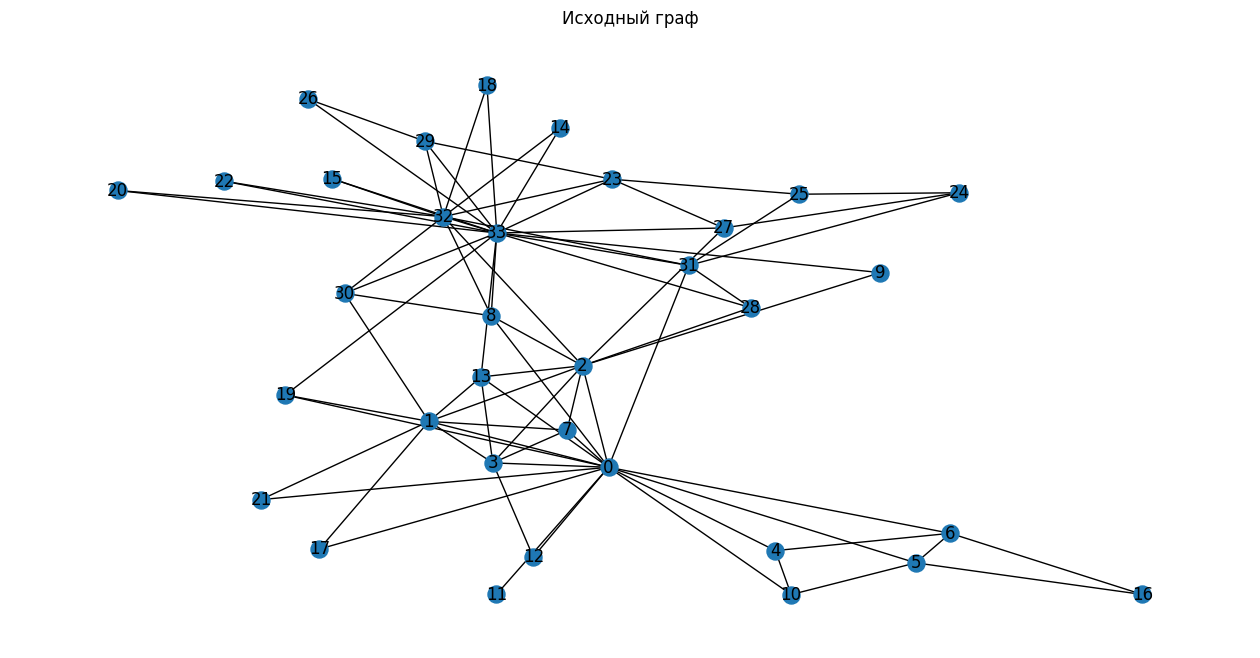

In [36]:
plt.figure(figsize=(16, 8))
plt.title("Исходный граф")
nx.draw_spring(G, with_labels=True, node_size=150)

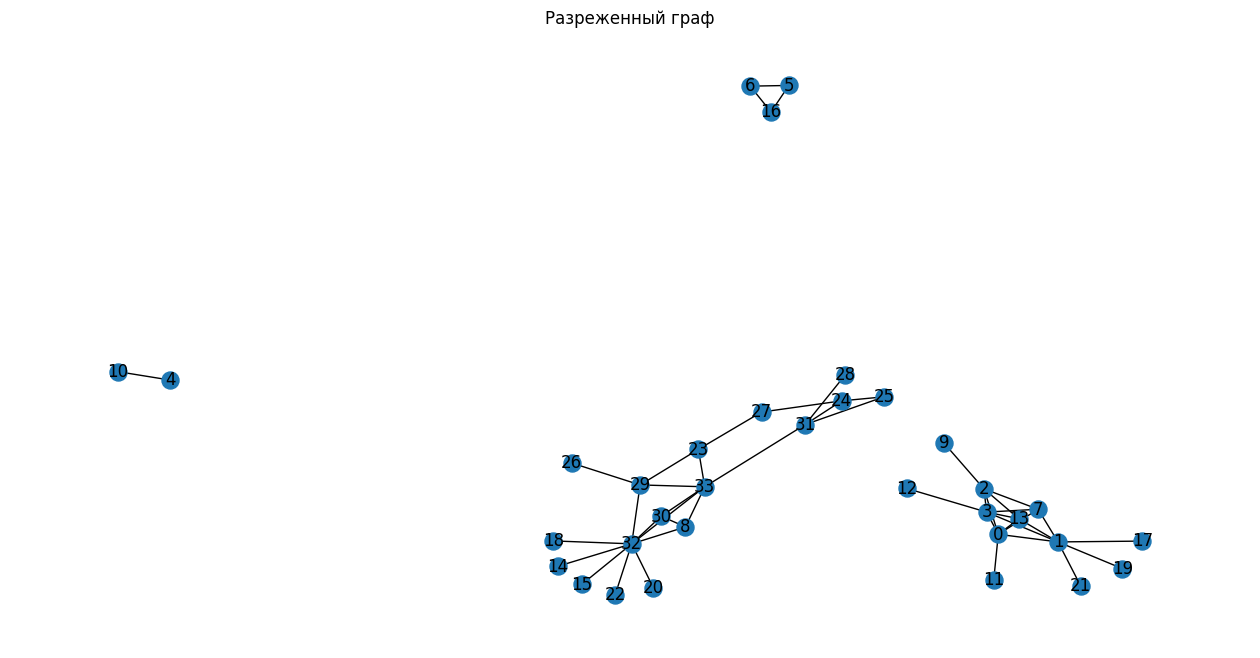

In [37]:
plt.figure(figsize=(16, 8))
plt.title("Разреженный граф")
nx.draw_spring(G_sparse, with_labels=True, node_size=150)